<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [6]:
# Concatenate X and y and overwrite the Boston variable
boston = pd.concat([y, X], axis='columns')
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#506 rows and 14 columns including the target variable MEDV (median home value)
boston.shape 

(506, 14)

In [8]:
#all fields are float data type
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
#There are no null values
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
#nothing unusual with the descriptive statistics (used the describe method).
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
#Use nuniuqe method to get unique values for each column:
boston.nunique()  

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

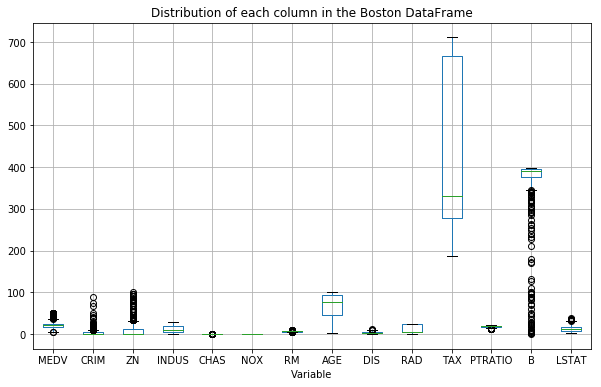

In [12]:
#take a look at the distribution for each feature using boxplot
ax = boston.boxplot(figsize=(10, 6))
ax.set_xlabel('Variable')
ax.set_title('Distribution of each column in the Boston DataFrame');

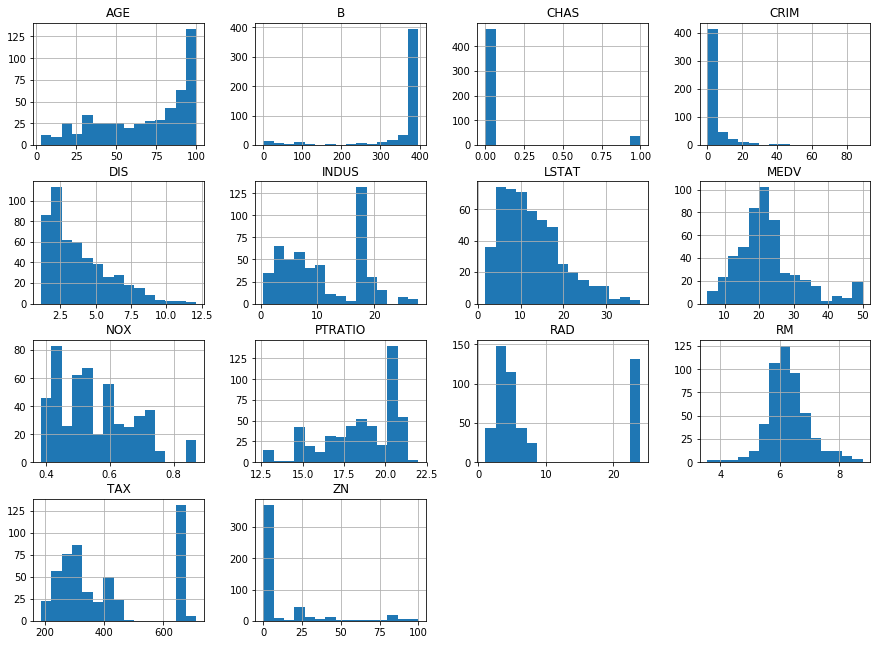

In [13]:
#take a look at the frequency count for each feature and how it's distributed using histogram
ax = boston.hist(bins=15, figsize=(15, 11))

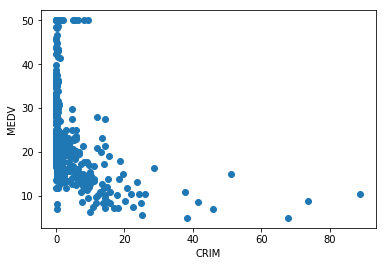

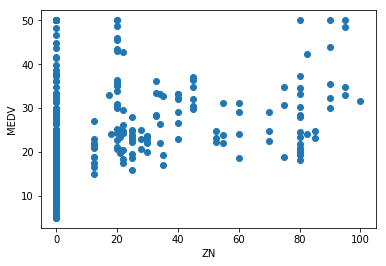

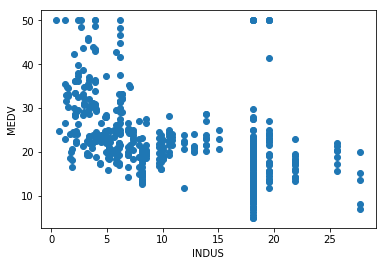

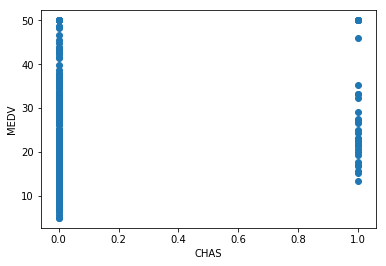

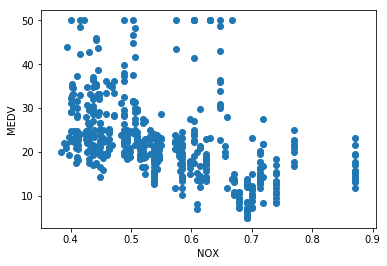

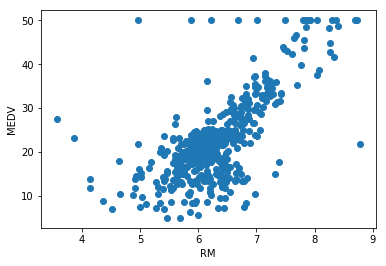

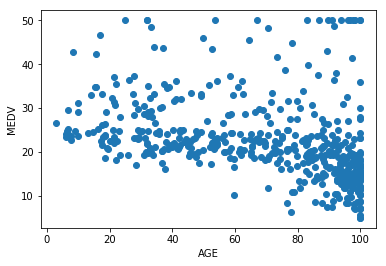

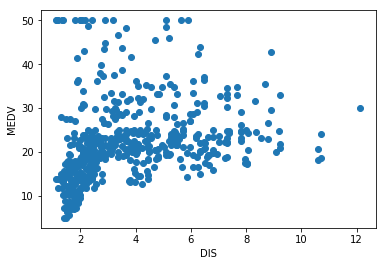

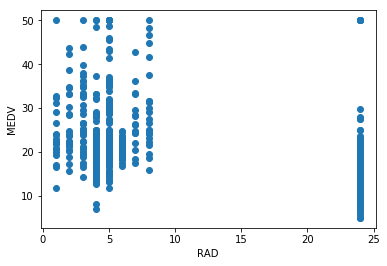

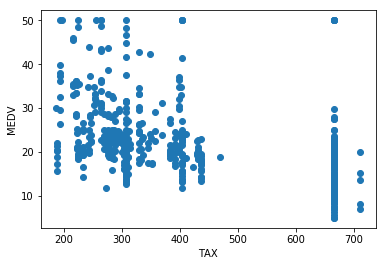

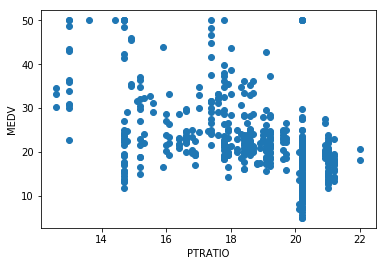

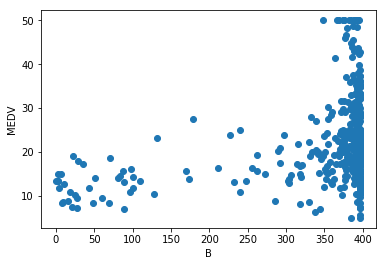

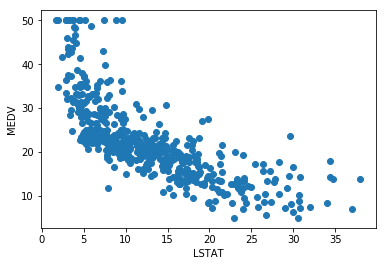

In [14]:
#Used for loop to review each column within the Boston dataframe except MEDV (used .drop method) to create scatterplot of each column with median price. Created variable x which captures all the rows for each columnn 
# being evaluated.  Used all the data for each feature in the subplots method and scatter method to generate all the charts.  
y = boston.loc[:, 'MEDV']
for feature in boston.drop('MEDV', axis='columns').columns:
    x = boston.loc[:, feature] 
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(feature)
    ax.set_ylabel("MEDV")

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [15]:
#Create an array with the same shape as y and populate it with the mean value
null_model = np.zeros(y.shape)
null_model += np.mean(y)
null_model

#calculate MSE between the actual values and the null model (avg. values)
from sklearn import metrics
mse = metrics.mean_squared_error(null_model, y)
mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [19]:
from sklearn.linear_model import LinearRegression

feature_cols =  boston.drop('MEDV', axis='columns').columns
X = boston.loc[:, feature_cols]
y = boston.loc[:, 'MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3) #, random_state=123)
#use train_size to specify 70% of the data and test_size to specify 30% of the data
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train MSE based on 70% of the data is: ', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE based on 30% of the data is: ', metrics.mean_squared_error(y_test, y_pred_test))

Train MSE based on 70% of the data is:  21.74835702920855
Test MSE based on 30% of the data is:  23.601265210888442


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [20]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))

24.042897239820594


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training set (MSE=21.75) performed much better than the null model (MSE=84.4).  This tells us that there is some benefit beyond guessing the mean every time and that there is low bias since the model did well with the training set.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The training set MSE is 21.75 and test set MSE is 23.6 or 24 if we consider the 10-fold cross-validation score.  Although the model did better on the training set, there isn't a huge difference in MSE between train and test sets and the values are not great (very low).  This seems to indicate high bias where the model is too simple and underfitting.   

- How much of a bias problem does your model appear to have? Why do you say that?

It appears to have more of a bias problem since the model did better on the training set and there isn't a huge difference in the MSE between train and test sets.  Also, if you look at the scatter plots for the various features, most do not have a linear relationship with the exception of  RM (average number of rooms per dwelling).  This indicates that a Linear Regression might be too simple for the shape of the data for the majority of the features. 

- How much of a variance problem does your model appear to have? Why do you say that?

I believe there may be somewhat of a variance problem since we included ALL features; however, it doesn't seem to be the largest portion of the total error. I would expect a bigger difference between the test MSE and train MSE if this was more of a variance problem.  

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [21]:
# Removed these 3 feautres (CHAS, RAD and PTRATIO) which seem to have the weakest linear relationship (if any) with the target.  

from sklearn.linear_model import LinearRegression

feature_cols = ['CRIM', 'INDUS', 'ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
X = boston.loc[:, feature_cols]
y = boston.loc[:, 'MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3) #, random_state=123)
#use train_size to specify 70% of the data and test_size to specify 30% of the data
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred_train1 = lr1.predict(X_train)
y_pred_test1 = lr1.predict(X_test)

print('Train MSE based on 70% of the data is: ', metrics.mean_squared_error(y_train, y_pred_train1))
print('Test MSE based on 30% of the data is: ', metrics.mean_squared_error(y_test, y_pred_test1))

Train MSE based on 70% of the data is:  22.900673038633904
Test MSE based on 30% of the data is:  19.15677898773071


In [22]:
#The K-Folds cross-validation score with 10 folds
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linreg1 = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
print(np.mean(-cross_val_score(linreg1, X, y, cv=kf, scoring='neg_mean_squared_error')))

23.193878273039836


We do see an improvement in the model, specifically the test-set MSE is 19.15 vs 23.6 from the original model, but the results on the training set are worse by +1.15.  

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [23]:
# Square RM (average number of rooms per dwelling) which has the strongest linear relationship with MEDV based on the scatter plots and removed these 3 feautres (CHAS, RAD and PTRATIO) wwhich seem to have the weakest linear relationship (if any) with the target.  

from sklearn.linear_model import LinearRegression

boston.loc[:, 'RM'] = boston.loc[:, 'RM']**2
feature_cols = ['CRIM', 'INDUS', 'ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
X = boston.loc[:, feature_cols]
y = boston.loc[:, 'MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3) #, random_state=123)
#use train_size to specify 70% of the data and test_size to specify 30% of the data
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred_train1 = lr1.predict(X_train)
y_pred_test1 = lr1.predict(X_test)

print('Train MSE based on 70% of the data is: ', metrics.mean_squared_error(y_train, y_pred_train1))
print('Test MSE based on 30% of the data is: ', metrics.mean_squared_error(y_test, y_pred_test1))

Train MSE based on 70% of the data is:  22.45856319422262
Test MSE based on 30% of the data is:  19.187907530826795


In [25]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))

23.246318010911683


There is no change in the model performance after squaring RM.  The difference was only 0.02 for the test set.  The kFold cross-validation was also the same as before.

# KNN Practice

In [26]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [27]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [28]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [29]:
#Identify the list of unique values for species
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
#Use map method and dictionary to map each species to a number.
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [31]:
#150 rows and 6 columns
iris.shape

(150, 6)

In [32]:
#length and width columns are float, species is an object and the new pecies_num column is an integer
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [33]:
#There are no null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [34]:
#nothing unusual with the descriptive statistics (used the describe method).
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
#Use nuniuqe method to get unique values for each column:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

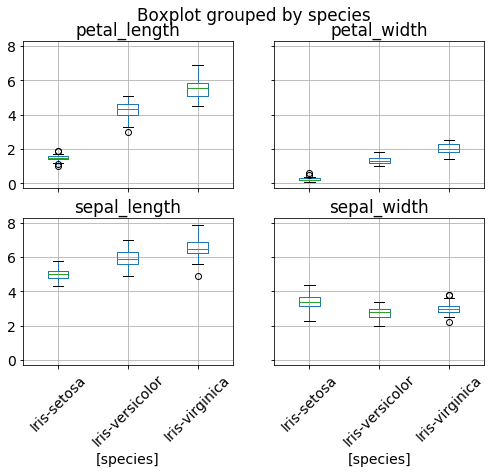

In [36]:
#take a look at the distribution for each feature using boxplot, grouped by species.  Need to first drop species_num.
iris_1 = iris.drop('species_num', axis='columns')
ax = iris_1.boxplot(by = 'species', rot=45, figsize=(8, 6));

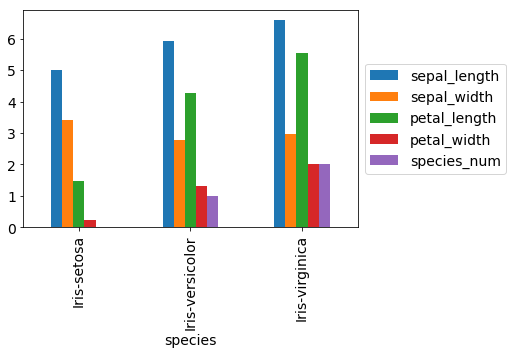

In [37]:
#take a look at avg. dimension for each feature, grouped by species
iris_1 = iris.drop('species_num', axis='columns')
ax = iris.groupby('species').mean().plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)); # Move the legend to the right of the chart for legibility

- Get the accuracy of a null model that simply predicts the most common species.

In [38]:
# first create an array with the same shape as y.  Fill it in with the most common value -- numpy "broadcasts" the sum over the whole array
# Iris-virginica, i.e. 2 is the most common species.    
y = iris.loc[:, 'species_num']
most_common_species = y.value_counts().idxmax() #gives us the most common value
null_pred = np.zeros(y.shape) + most_common_species
null_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [39]:
#Use the accuracy_score function to commpare the predicted value from the null model with the true values.  The results show 33% accuracy using the average value (null model).
metrics.accuracy_score(null_pred, y)

0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [181]:
#Identify the feature columns as X and the Y (target) which is species number
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

In [182]:
#Create the tran/test split before standardizing the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [186]:
# Standardize the feature variables using 'StandardScaler`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [203]:
# Instantiate KNeighborsClassifier using 20 nearest neighbors.  
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_st, y_train)
y_pred_test = knn.predict(X_test_st)
y_pred_train = knn.predict(X_train_st)

In [204]:
#Use K-Fold cross-validation with 10 splits (folds) to evaluate the model's accuracy
from sklearn import model_selection 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10) # instantite and split the data 10 times. Each time 1/10 data set used for testing and 9/10 for training.
print('Train accuracy for KNN with 10 folds: ', np.mean(cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')))
print('Test accuracy for KNN with 10 folds: ', np.mean(cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy')))

Train accuracy for KNN with 10 folds:  0.9727272727272727
Test accuracy for KNN with 10 folds:  0.6916666666666667


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model accuracy on the training set is 97.3% compared to only 33% for the null model. This tells us that there is some benefit beyond guessing the mean every time and that there is low bias since the model did well with the training set.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed better on the training set (97.3%) and much worse on new data (the test set) with accuracy of only 69.2%.  This big difference bewteen the test and train MSE's seems to indicate a high variance / low bias problem which is surprising since the value of k is very high. I was expecting high bias / low variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model appears to have more of a variance problem since the accuracy on the training set was very high and very low for the test set. 

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [167]:
# Instantiate KNeighborsClassifier using 5 nearest neighbors.  
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_st, y_train)
y_pred_test = knn.predict(X_test_st)
y_pred_train = knn.predict(X_train_st)

#Use K-Fold cross-validation with 10 splits (folds) to evaluate the model's accuracy
from sklearn import model_selection 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True) # instantite and split the data 10 times. Each time 1/10 data set used for testing and 9/10 for training.
print('Train accuracy for KNN with 10 folds: ', np.mean(cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')))
print('Test accuracy for KNN with 10 folds: ', np.mean(cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy')))

Train accuracy for KNN with 10 folds:  0.9833333333333334
Test accuracy for KNN with 10 folds:  0.95


I reduced k from 20 to 5 and the test accuracy improved significantly from 69.2% to 95% whereas the training set increased by only 1%.  This shows a big improvement in the model's ability to generalize on new data.

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

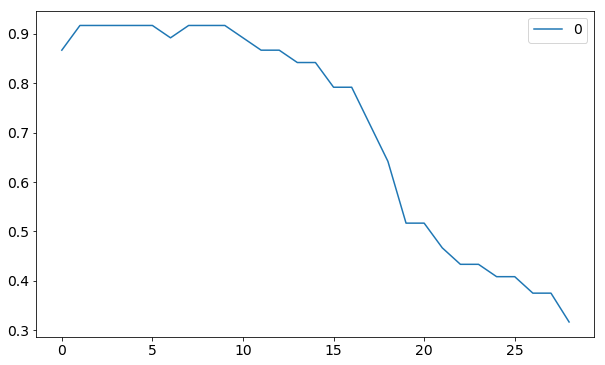

In [212]:
test_scores = [] 

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_st, y_train)
    y_pred = knn.predict(X_test_st)
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
    test_accuracy = np.mean(cross_val_score(knn, X_test_st, y_test, cv=kf, scoring='accuracy'))
    test_scores.append(test_accuracy)
    
ax = pd.DataFrame(test_scores).plot(figsize=(10, 6));

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
